In [14]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
print("set up done")

set up done


# P1.1 Download Hourly Data

Bosch data

In [30]:
bosch_df = yf.download('BOSCHLTD.NS',
                     start='2023-01-01',
                     end='2024-01-01',
                     interval='1h',
                     progress=True,
                    )
bosch_df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-02 09:15:00+05:30,17337.849609,17344.900391,17225.000000,17273.300781,17273.300781,0
2023-01-02 10:15:00+05:30,17292.099609,17300.949219,17228.650391,17284.050781,17284.050781,921
2023-01-02 11:15:00+05:30,17265.699219,17284.699219,17140.199219,17148.599609,17148.599609,1702
2023-01-02 12:15:00+05:30,17148.599609,17150.000000,17101.750000,17149.800781,17149.800781,1210
2023-01-02 13:15:00+05:30,17140.000000,17150.000000,17101.750000,17130.000000,17130.000000,1350


[Text(0.5, 1.0, 'Bosch Close')]

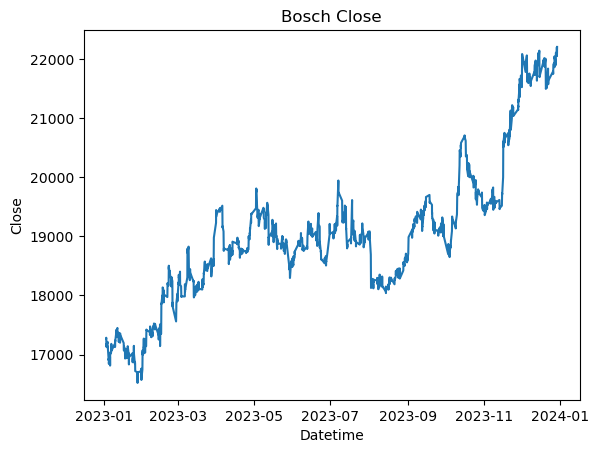

In [47]:
sns.lineplot(data = bosch_df, x="Datetime", y="Close").set(title="Bosch Close")
# sns.lineplot(data = bosch_df, x="Datetime", y="Close")


SnP500 data

In [32]:
SnP500_df = yf.download('^GSPC',
                     start='2023-01-01',
                     end='2024-01-01',
                     interval='1h',
                     progress=True,
                    )
SnP500_df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-03 09:30:00-05:00,3853.290039,3878.459961,3817.229980,3823.179932,3823.179932,0
2023-01-03 10:30:00-05:00,3823.649902,3837.610107,3810.219971,3815.540039,3815.540039,282312663
2023-01-03 11:30:00-05:00,3815.469971,3815.469971,3800.209961,3804.169922,3804.169922,224684476
2023-01-03 12:30:00-05:00,3804.239990,3813.949951,3794.330078,3810.050049,3810.050049,189491134
2023-01-03 13:30:00-05:00,3810.100098,3815.969971,3803.340088,3804.979980,3804.979980,190072000


# P1.2 Convert Hourly Data to Daily

In [33]:
def hourly_to_daily(df):
    # extract the datetime from index
    df['Datetime'] = df.index
    # extract date
    df['Date'] = df['Datetime'].dt.date
    # group by date
    grouped = df.groupby("Date")
    # make a new data frame
    daily_df = pd.DataFrame()
    daily_df["Open"] = grouped.first()["Open"]
    daily_df["High"] = grouped["High"].max()
    daily_df["Low"] = grouped["Low"].min()
    daily_df["Close"] = grouped.last()["Close"]
    daily_df["Volume"] = grouped["Volume"].sum()
    return daily_df
    
# issues right now
    # i am not able to understand the adj close right now
    # code will break if the data type is not date
        # df.dtypes['Datetime']
        # df['Datetime'] = pd.to_datetime(df['Datetime']) if needed
# learnings
    # print(list(df.columns)) will print all the columns
    # print(grouped.indices) will print the list of all grouped rows

In [34]:
SnP500_df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-03 09:30:00-05:00,3853.290039,3878.459961,3817.229980,3823.179932,3823.179932,0
2023-01-03 10:30:00-05:00,3823.649902,3837.610107,3810.219971,3815.540039,3815.540039,282312663
2023-01-03 11:30:00-05:00,3815.469971,3815.469971,3800.209961,3804.169922,3804.169922,224684476
2023-01-03 12:30:00-05:00,3804.239990,3813.949951,3794.330078,3810.050049,3810.050049,189491134
2023-01-03 13:30:00-05:00,3810.100098,3815.969971,3803.340088,3804.979980,3804.979980,190072000
2023-01-03 14:30:00-05:00,3805.010010,3825.419922,3796.540039,3818.550049,3818.550049,260261000
2023-01-03 15:30:00-05:00,3818.540039,3826.850098,3818.429932,3824.070068,3824.070068,325193000
2023-01-04 09:30:00-05:00,3840.360107,3855.750000,3815.770020,3830.439941,3830.439941,0
2023-01-04 10:30:00-05:00,3830.500000,3851.060059,3823.610107,3850.489990,3850.489990,299460987


In [35]:
SnP500_daily_df = hourly_to_daily(SnP500_df)
SnP500_daily_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.070068,1472014273
2023-01-04,3840.360107,3873.159912,3815.770020,3852.929932,1656812857
2023-01-05,3839.739990,3839.739990,3802.419922,3808.229980,1454685731
2023-01-06,3823.370117,3906.189941,3809.560059,3894.199951,1607257434
2023-01-09,3910.820068,3950.570068,3890.419922,3892.149902,1589854466


In [36]:
bosch_df.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-02 09:15:00+05:30,17337.849609,17344.900391,17225.000000,17273.300781,17273.300781,0
2023-01-02 10:15:00+05:30,17292.099609,17300.949219,17228.650391,17284.050781,17284.050781,921
2023-01-02 11:15:00+05:30,17265.699219,17284.699219,17140.199219,17148.599609,17148.599609,1702
2023-01-02 12:15:00+05:30,17148.599609,17150.000000,17101.750000,17149.800781,17149.800781,1210
2023-01-02 13:15:00+05:30,17140.000000,17150.000000,17101.750000,17130.000000,17130.000000,1350


In [37]:
bosch_daily_df = hourly_to_daily(bosch_df)
bosch_daily_df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-02,17337.849609,17344.900391,17090.000000,17169.650391,8183
2023-01-03,17219.949219,17250.000000,17099.000000,17133.750000,5456
2023-01-04,17100.000000,17119.449219,16800.000000,16857.400391,21519
2023-01-05,16950.000000,17044.800781,16751.000000,17006.699219,12414
2023-01-06,17055.000000,17196.500000,16990.050781,17065.699219,17760


# P1.3 Daily and Cumulative Returns

In [38]:
# daily return (open - close)/close
def daily_return(df):
    df["Daily Return"] = (df["Open"] - df["Close"])/df["Close"]

In [39]:
# Cumulative return
def cumulative_return(df):
    df["Cumulative return"] = df["Daily Return"].cumsum()

SnP500 Data

In [40]:
daily_return(SnP500_daily_df)
cumulative_return(SnP500_daily_df)
SnP500_daily_df.tail()

,Open,High,Low,Close,Volume,Daily Return,Cumulative return
Date,,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4755.160156,1118432241,-0.000261,-0.160804
2023-12-26,4758.859863,4784.720215,4758.450195,4774.939941,934619046,-0.003368,-0.164171
2023-12-27,4773.450195,4785.390137,4768.899902,4782.500000,1020451643,-0.001892,-0.166064
2023-12-28,4786.439941,4793.299805,4780.979980,4784.120117,981045727,0.000485,-0.165579
2023-12-29,4782.879883,4788.430176,4751.990234,4772.169922,1095132561,0.002244,-0.163334


<Axes: title={'center': 'SnP500 daily vs cumulative returns'}, xlabel='Date', ylabel='return %'>

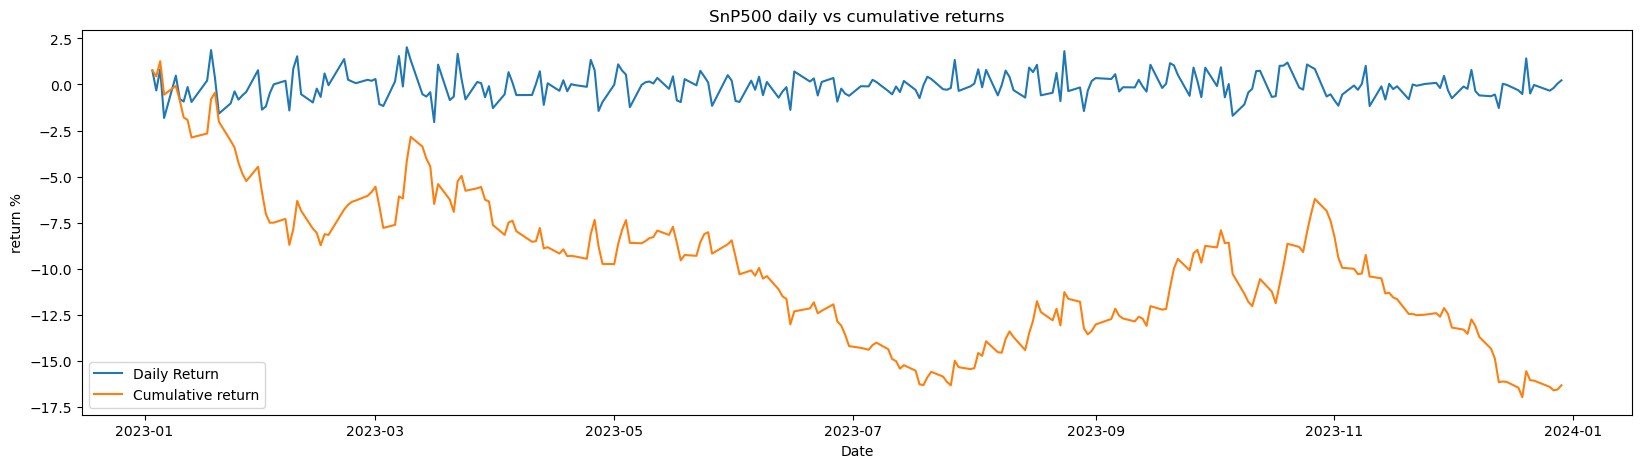

In [41]:
# Set the width and height
plt.figure(figsize=(20,5))

# Add titles
plt.title("SnP500 daily vs cumulative returns")
plt.ylabel("return %")

sns.lineplot(data = SnP500_daily_df["Daily Return"]*100, label="Daily Return")
sns.lineplot(data = SnP500_daily_df["Cumulative return"]*100, label="Cumulative return")

Bosch Data

In [42]:
daily_return(bosch_daily_df)
cumulative_return(bosch_daily_df)
bosch_daily_df.tail()

,Open,High,Low,Close,Volume,Daily Return,Cumulative return
Date,,,,,,,
2023-12-22,21695.000000,21893.750000,21506.849609,21633.949219,18147,0.002822,0.057890
2023-12-26,21644.400391,21939.199219,21588.000000,21905.900391,8182,-0.011937,0.045953
2023-12-27,21995.900391,22060.250000,21781.150391,22008.449219,13297,-0.000570,0.045383
2023-12-28,22050.000000,22238.949219,21860.000000,22102.699219,12760,-0.002384,0.042998
2023-12-29,22300.000000,22300.000000,21981.849609,22203.800781,25016,0.004333,0.047331


<Axes: title={'center': 'bosch daily vs cumulative returns'}, xlabel='Date', ylabel='return %'>

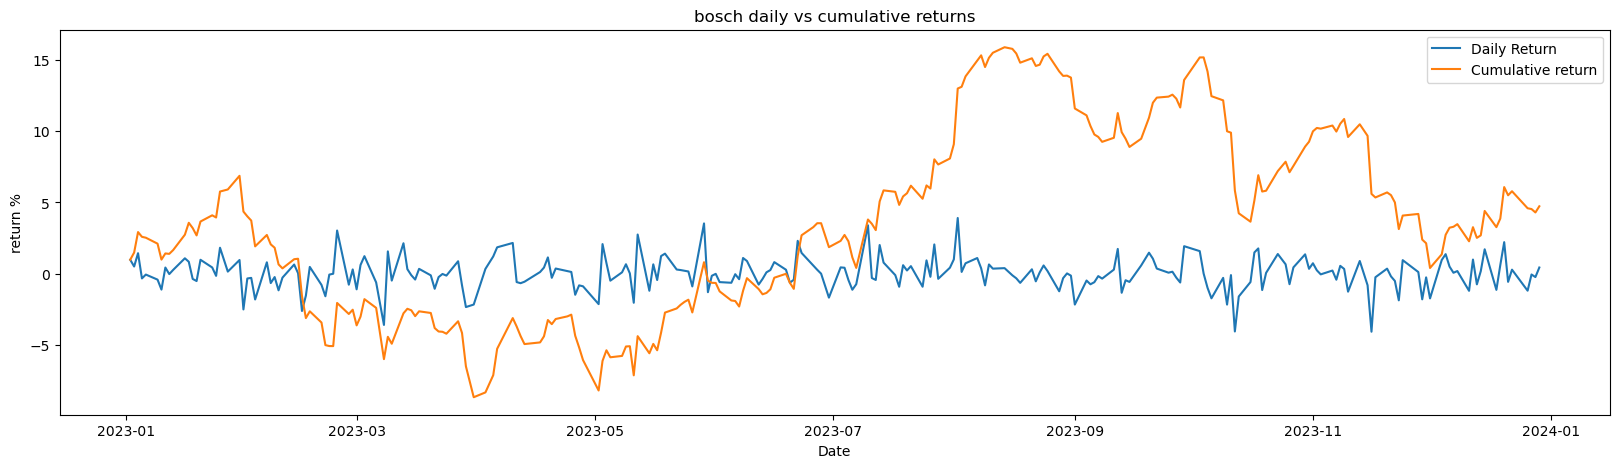

In [43]:
# Set the width and height
plt.figure(figsize=(20,5))

# Add titles
plt.title("bosch daily vs cumulative returns")
plt.ylabel("return %")

sns.lineplot(data = bosch_daily_df["Daily Return"]*100, label="Daily Return")
sns.lineplot(data = bosch_daily_df["Cumulative return"]*100, label="Cumulative return")

Daily return Bosch vs SnP500

<Axes: title={'center': 'bosch vs SnP500 daily return'}, xlabel='Date', ylabel='return %'>

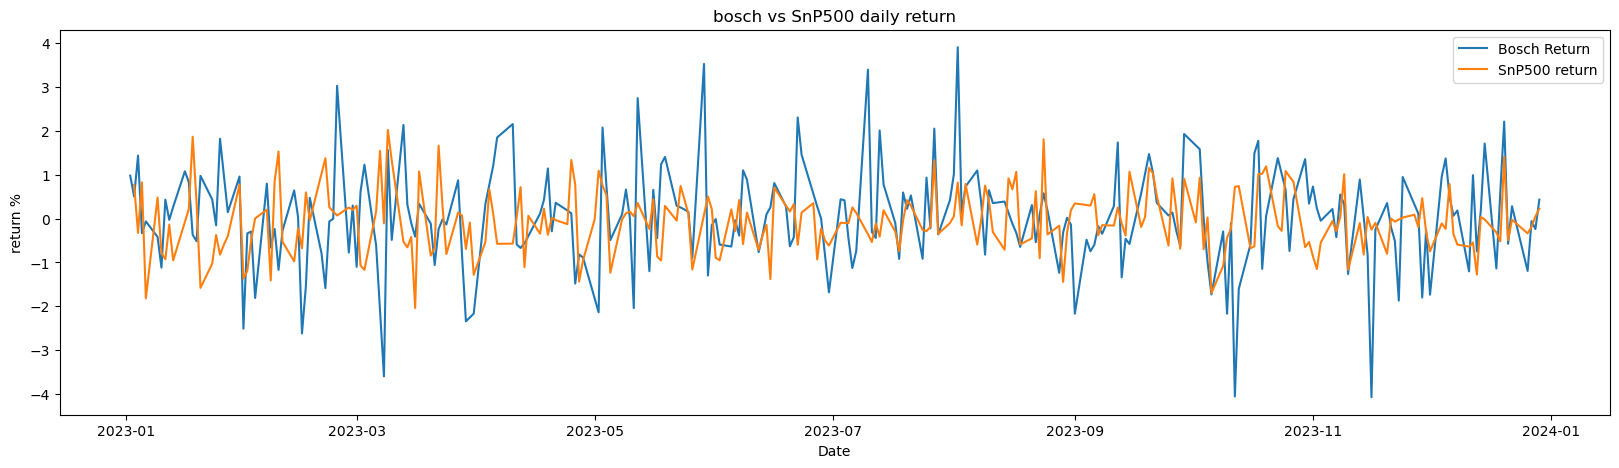

In [44]:
# Set the width and height
plt.figure(figsize=(20,5))

# Add titles
plt.title("bosch vs SnP500 daily return")
plt.ylabel("return %")

sns.lineplot(data = bosch_daily_df["Daily Return"]*100, label="Bosch Return")
sns.lineplot(data = SnP500_daily_df["Daily Return"]*100, label="SnP500 return")

Cumulative return Bosch vs SnP500

<Axes: title={'center': 'bosch vs SnP500 Cumulative Return'}, xlabel='Date', ylabel='return %'>

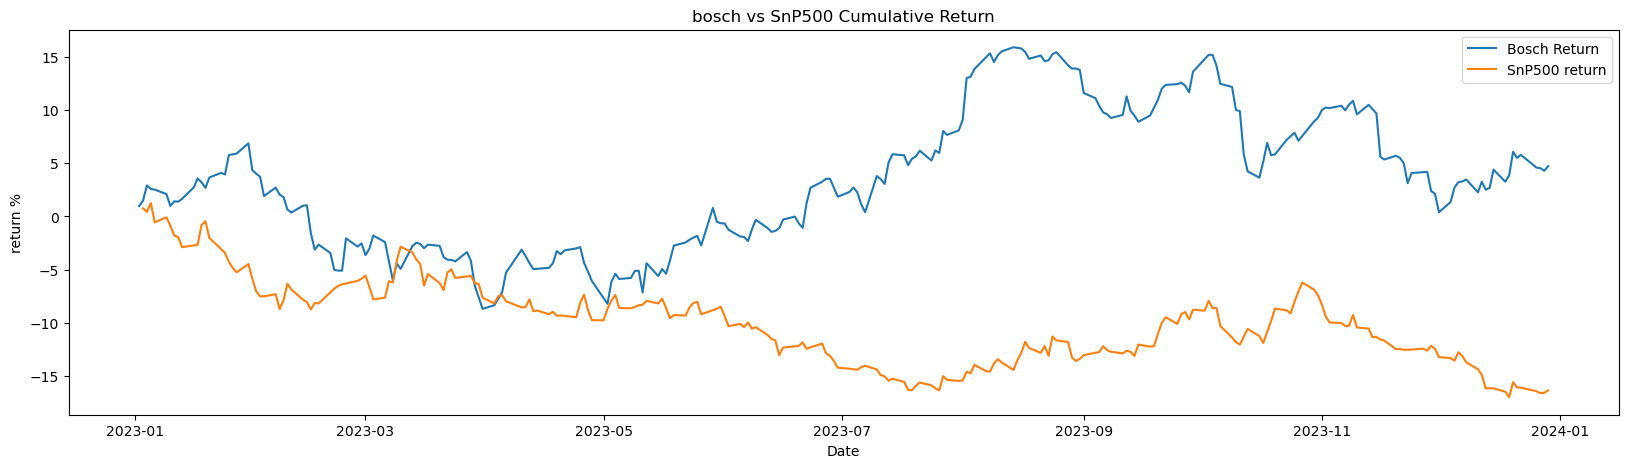

In [46]:
# Set the width and height
plt.figure(figsize=(20,5))

# Add titles
plt.title("bosch vs SnP500 Cumulative Return")
plt.ylabel("return %")

sns.lineplot(data = bosch_daily_df["Cumulative return"]*100, label="Bosch Return")
sns.lineplot(data = SnP500_daily_df["Cumulative return"]*100, label="SnP500 return")

# P2.1 Download Daily Data (ticker)

In [48]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="1y")
aapl_df.tail()
# aapl_df['Close'].plot(title="APPLE's stock price")

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-05-06 00:00:00-04:00,182.103015,183.950500,180.175621,181.463882,78569700,0.00,0.0
2024-05-07 00:00:00-04:00,183.201504,184.649537,181.074400,182.152924,77305800,0.00,0.0
2024-05-08 00:00:00-04:00,182.602329,182.822032,181.204216,182.492477,45057100,0.00,0.0
2024-05-09 00:00:00-04:00,182.312720,184.409882,181.863333,184.320007,48983000,0.00,0.0
2024-05-10 00:00:00-04:00,184.899994,185.089996,182.130005,183.050003,50727400,0.25,0.0


# P2.2 Calculate a new datetime attribute

In [49]:
edit_df = aapl_df.copy()
# add day
edit_df['Datetime'] = edit_df.index
# edit_df['Date'] = edit_df['Datetime'].dt.date
edit_df['Day'] = edit_df['Datetime'].dt.dayofweek
# map the day with the number
edit_df['Day'] = edit_df['Day'].map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})
edit_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Datetime,Day
Date,,,,,,,,,
2023-05-11 00:00:00-04:00,172.692755,173.427819,171.023930,172.593414,49514700,0.00,0.0,2023-05-11 00:00:00-04:00,Thursday
2023-05-12 00:00:00-04:00,172.702827,173.140505,170.096673,171.658386,45497800,0.24,0.0,2023-05-12 00:00:00-04:00,Friday
2023-05-15 00:00:00-04:00,172.245264,172.295003,170.564190,171.161026,37266700,0.00,0.0,2023-05-15 00:00:00-04:00,Monday
2023-05-16 00:00:00-04:00,171.081447,172.225366,170.892448,171.161026,42110300,0.00,0.0,2023-05-16 00:00:00-04:00,Tuesday
2023-05-17 00:00:00-04:00,170.802922,172.016463,169.519728,171.777740,57951600,0.00,0.0,2023-05-17 00:00:00-04:00,Wednesday


Day
Friday       15
Monday       12
Thursday     11
Tuesday       9
Wednesday     6
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='Day'>

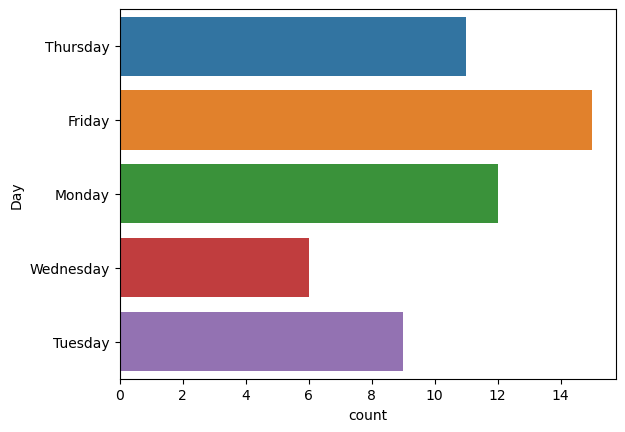

In [55]:
# get the max close day of the week
    # group the day for the same week
    # find max day
    # make a new DataFrame for the max days to plot
max_day = edit_df.loc[edit_df.groupby([pd.Grouper(key='Datetime', freq='W')])['Close'].idxmax()]['Day']
max_day.index = np.arange(0, len(max_day.index))
max_day = pd.DataFrame(max_day)
print(max_day.Day.value_counts())

# plot the graph
sns.countplot(data= max_day, y = "Day", legend = False, hue=max_day['Day'])

Hence it can be seen that for the last year 
FRIDAY was the day of max close of Apple

# P2.3 Claculating the 7-Day Rolling Mean

In [56]:
def rolling_mean(days, df, column):
    df[f'{str(days)}-day rolling mean of {column}'] = df[column].rolling(days).mean()
    # need to learn how rolling workes


In [57]:
rolling_mean(7, aapl_df, "Close")
rolling_mean(14, aapl_df, "Close")
aapl_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,7-day rolling mean of Close,14-day rolling mean of Close
Date,,,,,,,,,
2023-05-11 00:00:00-04:00,172.692755,173.427819,171.023930,172.593414,49514700,0.00,0.0,NaN,NaN
2023-05-12 00:00:00-04:00,172.702827,173.140505,170.096673,171.658386,45497800,0.24,0.0,NaN,NaN
2023-05-15 00:00:00-04:00,172.245264,172.295003,170.564190,171.161026,37266700,0.00,0.0,NaN,NaN
2023-05-16 00:00:00-04:00,171.081447,172.225366,170.892448,171.161026,42110300,0.00,0.0,NaN,NaN
2023-05-17 00:00:00-04:00,170.802922,172.016463,169.519728,171.777740,57951600,0.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-05-06 00:00:00-04:00,182.103015,183.950500,180.175621,181.463882,78569700,0.00,0.0,174.128106,170.642832
2024-05-07 00:00:00-04:00,183.201504,184.649537,181.074400,182.152924,77305800,0.00,0.0,175.996998,171.670009
2024-05-08 00:00:00-04:00,182.602329,182.822032,181.204216,182.492477,45057100,0.00,0.0,177.315212,172.789919


<Axes: xlabel='Date', ylabel='Close'>

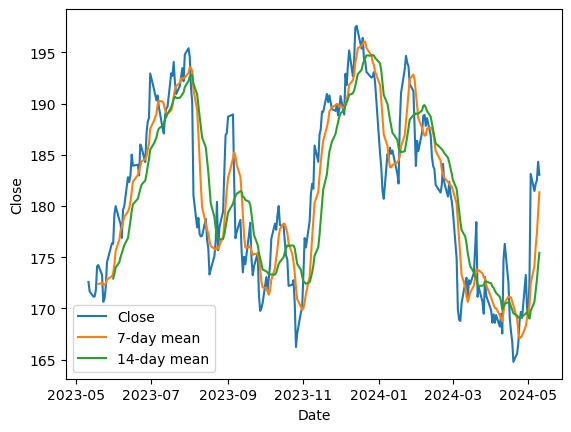

In [58]:
sns.lineplot(data = aapl_df["Close"], label="Close")
sns.lineplot(data = aapl_df["7-day rolling mean of Close"], label="7-day mean")
sns.lineplot(data = aapl_df["14-day rolling mean of Close"], label="14-day mean")

<Axes: xlabel='Date'>

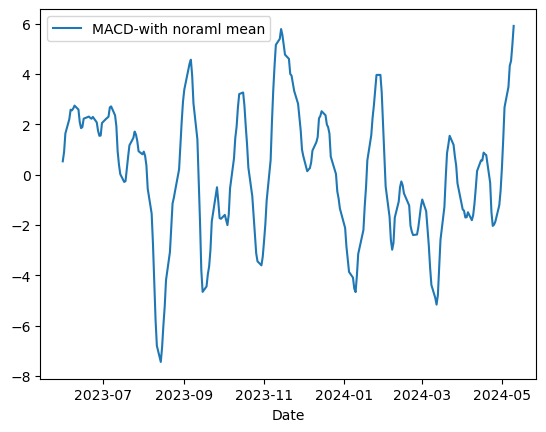

In [59]:
sns.lineplot(data = aapl_df["7-day rolling mean of Close"] - aapl_df["14-day rolling mean of Close"], label="MACD-with noraml mean")